#Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zf = "/content/drive/MyDrive/DL_Tubes_Data/archive (1).zip"
target_dir = "/content/dataset/cnn/gender"

zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

# 1 Set up

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1.1 Define Constants

In [ ]:
train_path = '/content/dataset/cnn/gender/Radiographs/train'
test_path = '/content/dataset/cnn/gender/Radiographs/test'
valid_path = '/content/dataset/cnn/gender/Radiographs/val'

In [ ]:

#Define standard parameter values
batch_size = 16
img_height = 500
img_width = 500


# 2 Preparing Data

## 2.2 Image Data Augmentation

In [ ]:
#berikan persentase data

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

image_gen = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,

                               )

test_data_gen = ImageDataGenerator(rescale = 1./255)



train = image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='rgb',
    class_mode='binary',
    batch_size=batch_size
                                      )

test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',shuffle=False,
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='binary',
      batch_size=batch_size
      )

Found 686 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [ ]:
type(train)

keras.src.legacy.preprocessing.image.DirectoryIterator

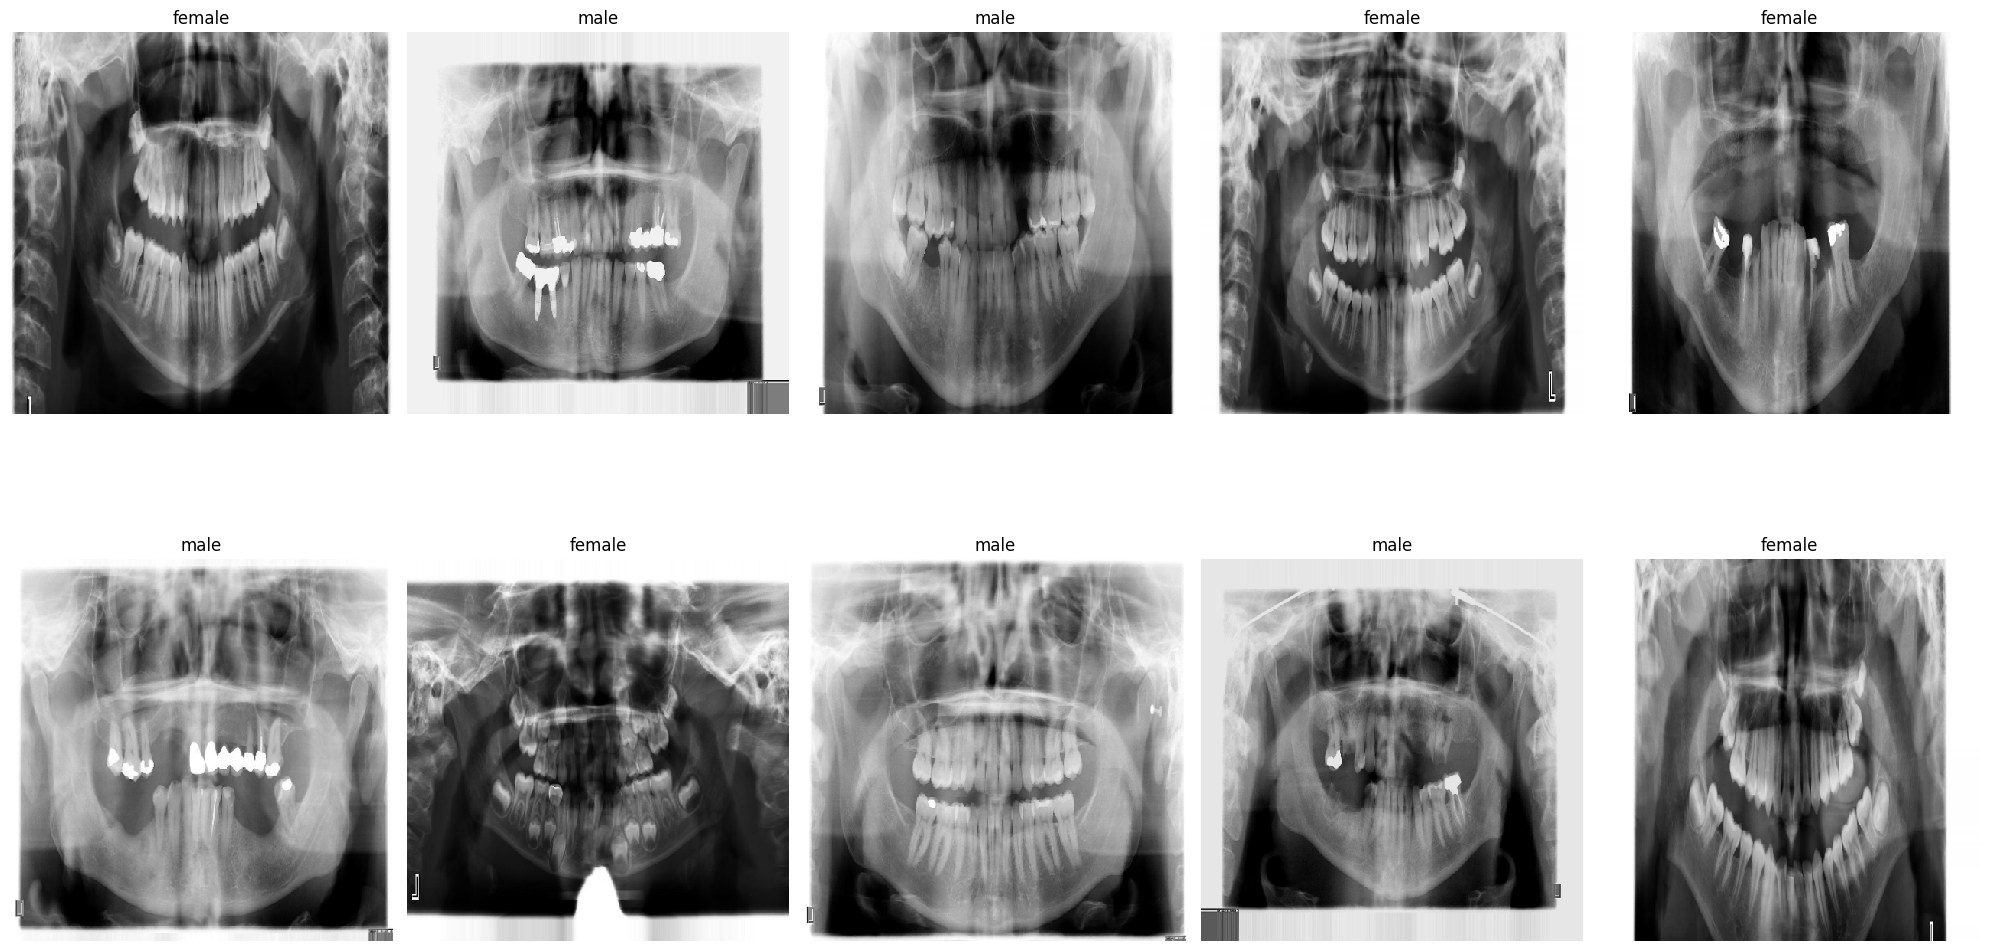

In [ ]:
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        dic = {0:'male', 1:'female'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

### Define

In [ ]:
'''        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening

        rotation_range = 15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False,# randomly flip images
        shear_range=0.2,
        brightness_range=(1.2, 1.5)'''

'        featurewise_center=False,  # set input mean to 0 over the dataset\n        samplewise_center=False,  # set each sample mean to 0\n        featurewise_std_normalization=False,  # divide inputs by std of the dataset\n        samplewise_std_normalization=False,  # divide each input by its std\n        zca_whitening=False,  # apply ZCA whitening\n\n        rotation_range = 15,  # randomly rotate images in the range (degrees, 0 to 180)\n        zoom_range = 0.2, # Randomly zoom image\n        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)\n        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)\n        horizontal_flip = True,  # randomly flip images\n        vertical_flip=False,# randomly flip images\n        shear_range=0.2,\n        brightness_range=(1.2, 1.5)'

In [ ]:
ktu

# 3 Tensorflow - Keras

In [ ]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

## 3.1 Convolutional Neural Network Model

In [ ]:
# let's build the CNN model
# variasi dari aktivasi,- perbandingan antar dokumentasi awal dengan percobaan mandiri, -kombinasi hyperparameter, -buat model h5 lainnya

cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))


cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 498, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 247, 247, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 123, 123, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 121, 121, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 58, 58, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,467,713 (5.60 MB)

 Trainable params: 1,467,713 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

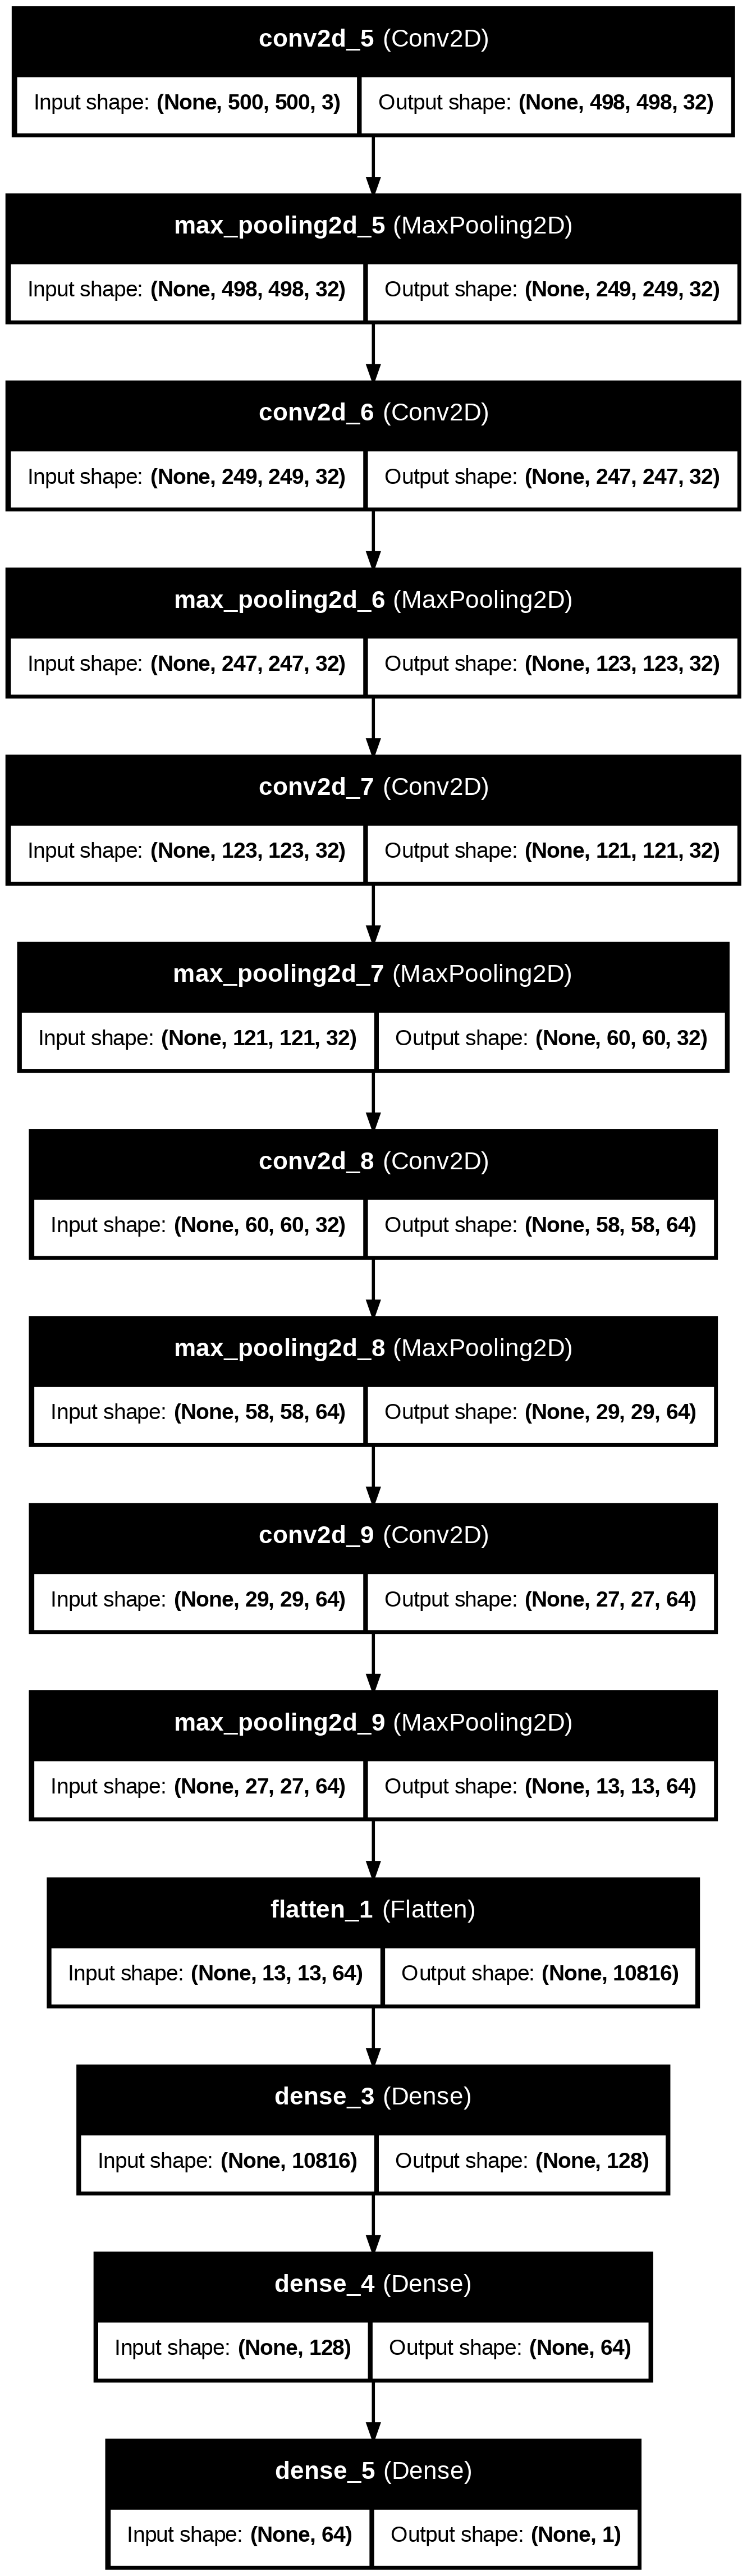

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

## 3.2 Fit Model

In [ ]:
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [ ]:
#dah di ubah
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(train.classes)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=train.classes)

cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.0, 1: 1.0}


In [ ]:
cnn.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6013 - loss: 0.6268 - val_accuracy: 0.5816 - val_loss: 0.6854 - learning_rate: 0.0010
Epoch 2/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 841ms/step - accuracy: 0.8084 - loss: 0.4346 - val_accuracy: 0.8316 - val_loss: 0.4407 - learning_rate: 0.0010
Epoch 3/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 826ms/step - accuracy: 0.8723 - loss: 0.3625 - val_accuracy: 0.9592 - val_loss: 0.1143 - learning_rate: 0.0010
Epoch 4/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 833ms/step - accuracy: 0.9494 - loss: 0.1376 - val_accuracy: 0.9694 - val_loss: 0.0932 - learning_rate: 0.0010
Epoch 5/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 84s 909ms/step - accuracy: 0.9626 - loss: 0.1177 - val_accuracy: 0.9592 - val_loss: 0.0975 - learning_rate: 0.0010
Epoch 6/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 44s 881ms/step - accuracy: 0.9174 - loss: 0.2003 - val_accuracy: 0.9694 - val_loss: 0.0710 - learning_rate: 0.0010
Epoch 7/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 866ms/step - accuracy: 0.9600 - loss: 0.1070 - val_acc

In [ ]:
# prompt: simpan model yang dilatih sebelumnya dengan nama "gender_v1"

# Save the trained model
cnn.save('gender_v1.h5')

In [ ]:
# fp = "/content/drive/My Drive/cnn_pneu_vamp_model.h5"
# #cnn.save(fp)

In [ ]:
# cnn = load_model(fp)

##3.3 Evaluation

<Axes: >

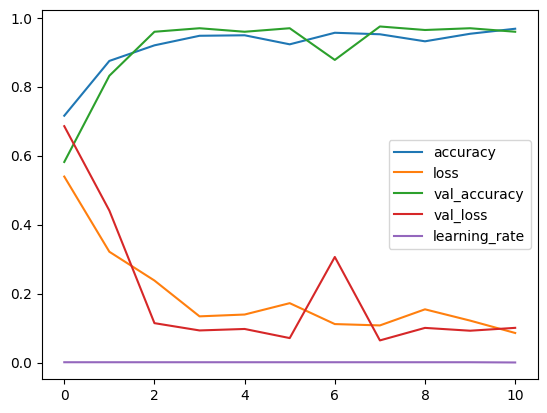

In [ ]:
pd.DataFrame(cnn.history.history).plot()

In [ ]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.8750 - loss: 0.2689

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.9127 - loss: 0.2254
The testing accuracy is : 93.8144326210022 %


In [ ]:
preds = cnn.predict(test,verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step


In [ ]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<Axes: >

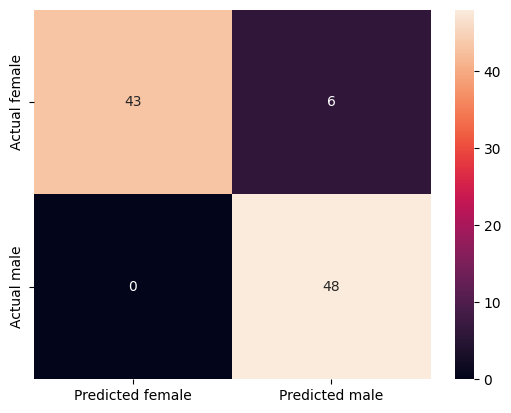

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),
                  index=["Actual female", "Actual male"],
                  columns=["Predicted female", "Predicted male"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
 print(classification_report(y_true=test.classes, y_pred=predictions,
                            target_names =['male','female']
 ))

              precision    recall  f1-score   support

        male       1.00      0.88      0.93        49
      female       0.89      1.00      0.94        48

    accuracy                           0.94        97
   macro avg       0.94      0.94      0.94        97
weighted avg       0.95      0.94      0.94        97



In [ ]:
#udah di ubah

import numpy as np

test.reset()
# Use __next__() and a loop to get batches of data
x_batches = []
y_batches = []
for i in range(len(test)):  # len(test) gives the number of batches
    batch_x, batch_y = test.__next__()  # Use __next__() to get the next batch
    x_batches.append(batch_x)
    y_batches.append(batch_y)

# Concatenate the batches into single arrays
x = np.concatenate(x_batches)
y = np.concatenate(y_batches)

print(x.shape)
print(y.shape)

(97, 500, 500, 3)
(97,)


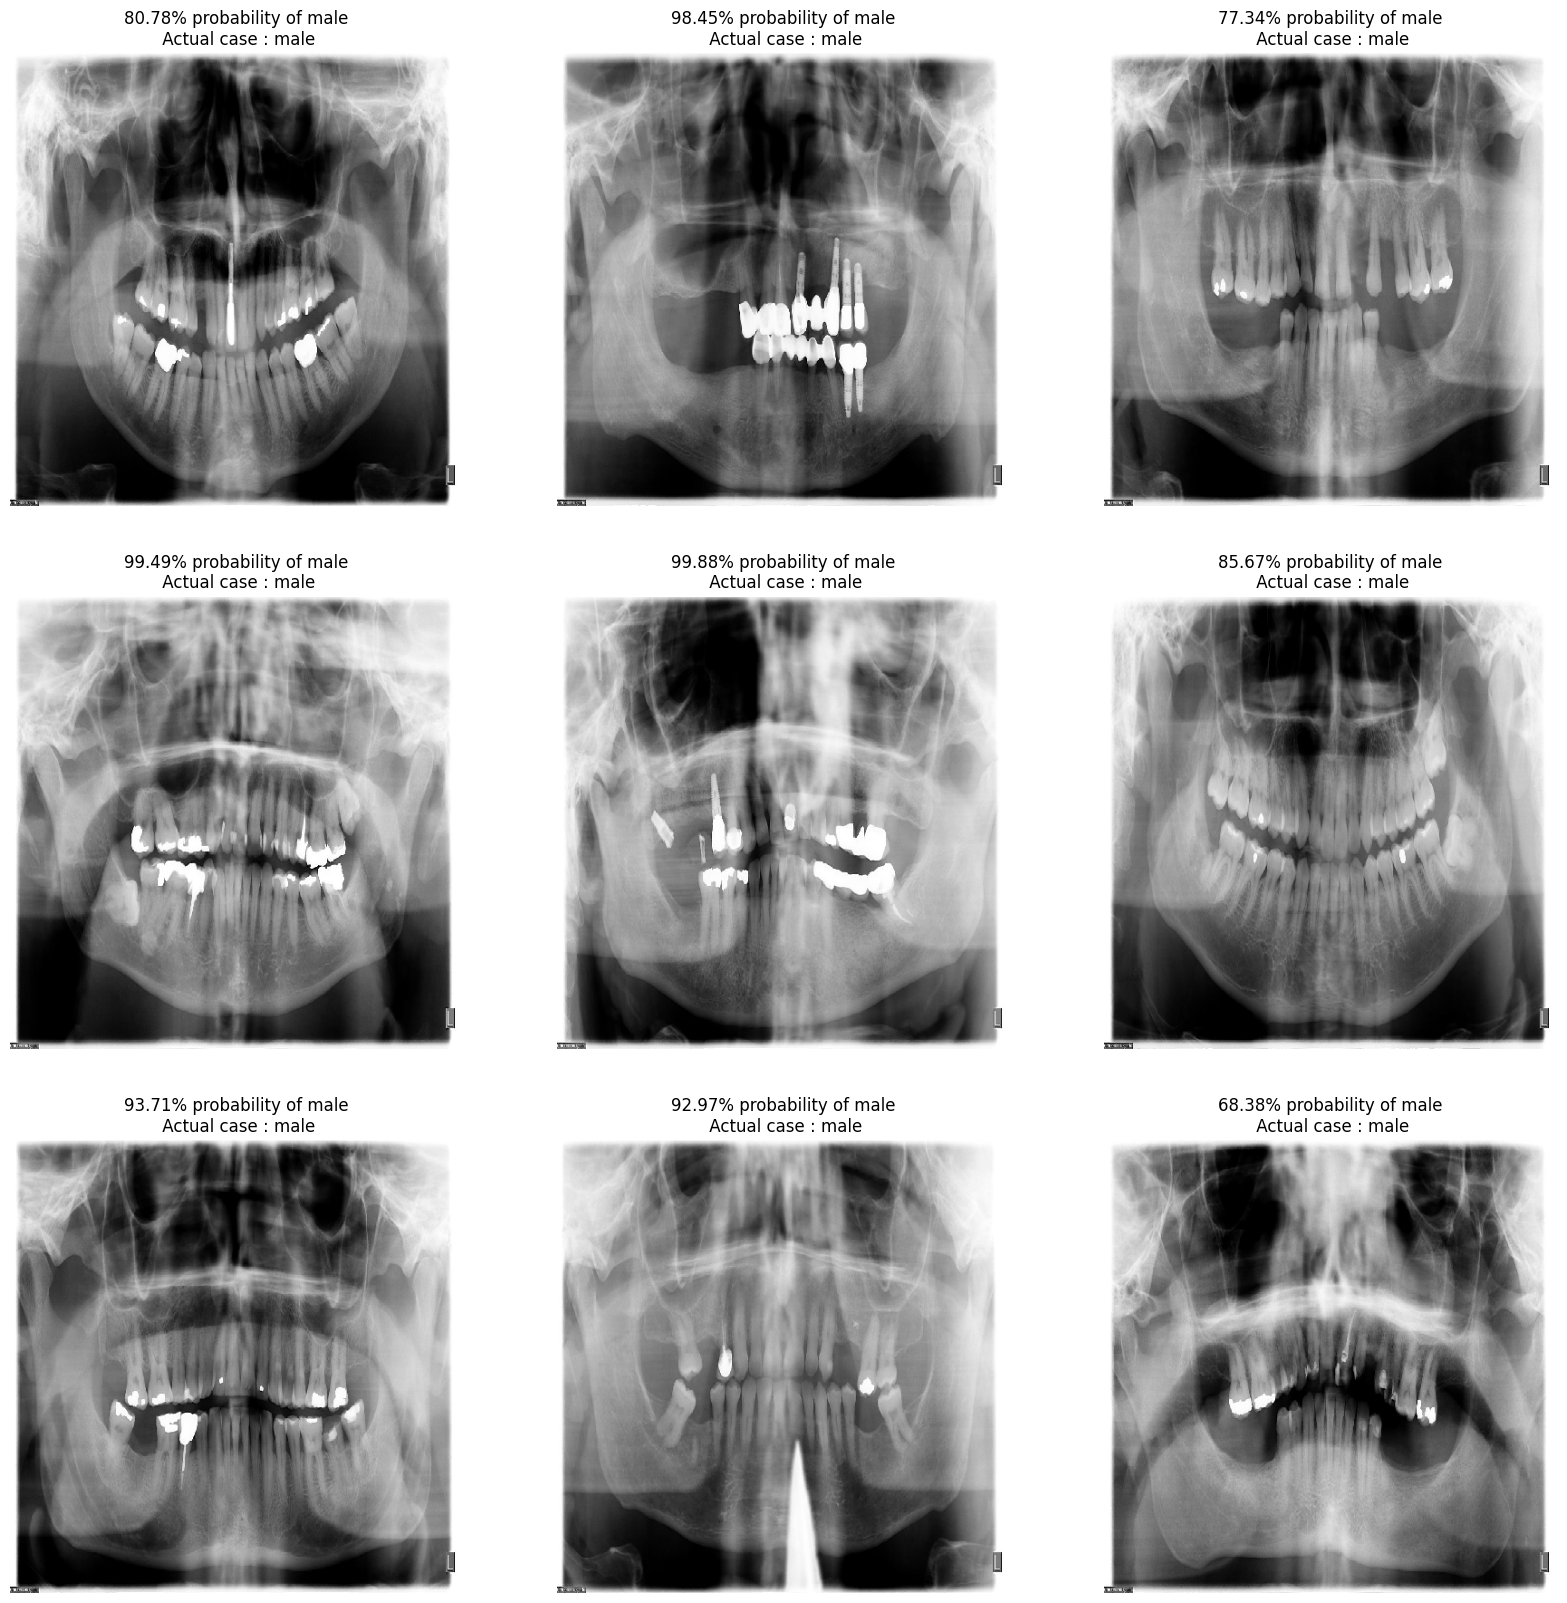

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dic = {0:'male', 1:'female'}
plt.figure(figsize=(20,20))
# Adjust the loop range to stay within the bounds of the preds and x arrays
for i in range(min(9, len(preds))):
  plt.subplot(3, 3, i + 1)
  if preds[i, 0] >= 0.5:
      out = ('{:.2%} probability of female'.format(preds[i][0]))


  else:
      out = ('{:.2%} probability of male'.format(1-preds[i][0]))



  plt.title(out+"\n Actual case : "+ dic.get(y[i]))
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [ ]:
'''import plotly.graph_objects as go
fig = go.Figure( go.Scatter(y=y ) )
fig.show()'''

'import plotly.graph_objects as go\nfig = go.Figure( go.Scatter(y=y ) )\nfig.show()'

In [ ]:
'''import plotly.graph_objects as go
fig = go.Figure( go.Scatter(y=predictions[:,0] ) )
fig.show()'''

'import plotly.graph_objects as go\nfig = go.Figure( go.Scatter(y=predictions[:,0] ) )\nfig.show()'

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


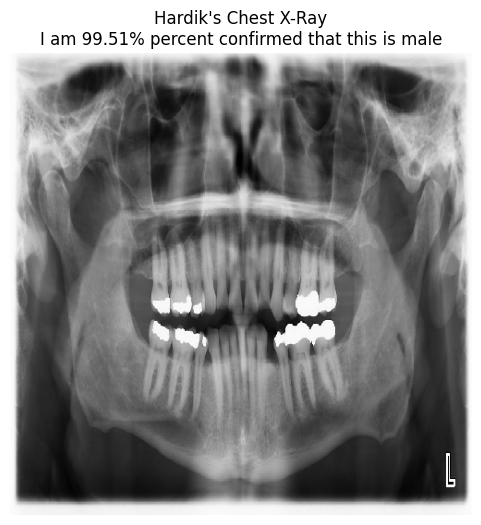

In [ ]:
# Testing with my own Chest X-Ray
hardik_path = '/content/dataset/cnn/gender/Radiographs/test/male/male.441.JPG'

from tensorflow.keras.preprocessing import image

hardik_img = image.load_img(hardik_path, target_size=(500, 500),color_mode='rgb')

# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

#predict
hardik_preds= cnn.predict(pp_hardik_img)

#print
plt.figure(figsize=(6,6))
plt.axis('off')
if hardik_preds>= 0.5:
    out = ('I am {:.2%} percent confirmed that this is male'.format(hardik_preds[0][0]))

else:
    out = ('I am {:.2%} percent confirmed that this is female'.format(1-hardik_preds[0][0]))


plt.title("Hardik's Chest X-Ray\n"+out)
plt.imshow(np.squeeze(pp_hardik_img))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


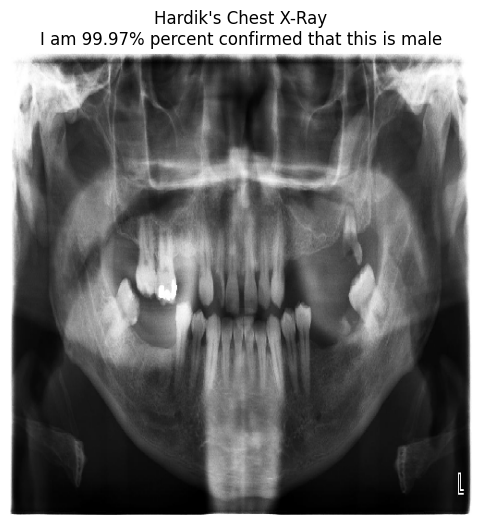

In [ ]:
#dah di ubah pake model yang dah di buat


# import zipfile
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
# from tensorflow.keras.models import Sequential,load_model,save_model
# from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
# from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# from tensorflow.keras.utils import plot_model
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.metrics import classification_report,confusion_matrix
# import seaborn as sns
# from tensorflow.keras.preprocessing import image

# Load the saved model
model_path = 'gender_v1.h5' #@param {type:"string"}
cnn = load_model(model_path)

# Testing with my own Chest X-Ray
hardik_path = '/content/dataset/cnn/gender/Radiographs/test/male/male.445.JPG' #@param {type:"string"}


hardik_img = image.load_img(hardik_path, target_size=(500, 500),color_mode='rgb')

# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

#predict
hardik_preds= cnn.predict(pp_hardik_img)

#print
plt.figure(figsize=(6,6))
plt.axis('off')
if hardik_preds>= 0.5:
    out = ('I am {:.2%} percent confirmed that this is male'.format(hardik_preds[0][0]))

else:
    out = ('I am {:.2%} percent confirmed that this is female'.format(1-hardik_preds[0][0]))


plt.title("Hardik's Chest X-Ray\n"+out)
plt.imshow(np.squeeze(pp_hardik_img))
plt.show()

# 4 Transfer learning

## 4.1 Model Pretrained (Transfer Learning)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1. Load Pretrained ResNet50 Model
# We do not want to include the top fully connected layers as we want to add our own for classification task
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# 2. Freeze the base model (do not train the layers of the base model)
base_model.trainable = False  # Freeze base model layers

# 3. Add custom layers for our task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
x = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification (male/female)

# 4. Create the new model
model = Model(inputs=base_model.input, outputs=x)

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 6. Print the model summary to confirm the architecture
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 500, 500, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 506, 506, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 250, 250, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 250, 250, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 250, 250, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 252, 252, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 125, 125, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 125, 125, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 125, 125, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 125, 125, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 125, 125, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 125, 125, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 125, 125, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 125, 125, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 125, 125, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## 4.2 Fine-tuning

In [ ]:
# Fine-tuning: Unfreeze some top layers of the base model
base_model.trainable = True  # Unfreeze the layers of the base model

# You can freeze all layers except the last few
# In this case, we will unfreeze all layers after the 140th layer of ResNet50
for layer in base_model.layers[:140]:
    layer.trainable = False

# Re-compile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to confirm fine-tuning
model.summary()


Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 500, 500, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 506, 506, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 250, 250, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 250, 250, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 250, 250, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 252, 252, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 125, 125, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 125, 125, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 125, 125, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 125, 125, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 125, 125, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 125, 125, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 125, 125, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 125, 125, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 125, 125, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 17,077,249 (65.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [ ]:
from tensorflow.keras.utils import plot_model
import pydotplus

plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, to_file='model_resnet.png') # Save to a file

InvocationException: Program terminated with status: -6. stderr follows: failed at node 12180[1]
dot: maze.c:313: chkSgraph: Assertion `np->cells[1]' failed.


## 4.3 Train Model

In [ ]:
# 4. Train the model using the flow_from_directory generator
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=0.0001)

callbacks = [early_stopping, learning_rate_reduction]

# Fit the model
history = model.fit(train, epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks)

# Save the model
model.save('gender_resnet50_transfer_learning.h5')


Epoch 1/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6841 - loss: 0.5823 - val_accuracy: 0.5000 - val_loss: 1.4963 - learning_rate: 1.0000e-04
Epoch 2/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 106s 935ms/step - accuracy: 0.8484 - loss: 0.3308 - val_accuracy: 0.5000 - val_loss: 0.6905 - learning_rate: 1.0000e-04
Epoch 3/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 943ms/step - accuracy: 0.8490 - loss: 0.3844 - val_accuracy: 0.7347 - val_loss: 0.5549 - learning_rate: 1.0000e-04
Epoch 4/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 81s 944ms/step - accuracy: 0.9174 - loss: 0.2228 - val_accuracy: 0.5000 - val_loss: 1.4228 - learning_rate: 1.0000e-04
Epoch 5/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9188 - loss: 0.2325 - val_accuracy: 0.9031 - val_loss: 0.2984 - learning_rate: 1.0000e-04
Epoch 6/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 48s 937ms/step - accuracy: 0.8879 - loss: 0.2756 - val_accuracy: 0.8520 - val_loss: 0.3603 - learning_rate: 1.0000e-04
Epoch 7/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 47s 961ms/step - accuracy

## 4.4 Evaluation

<Axes: >

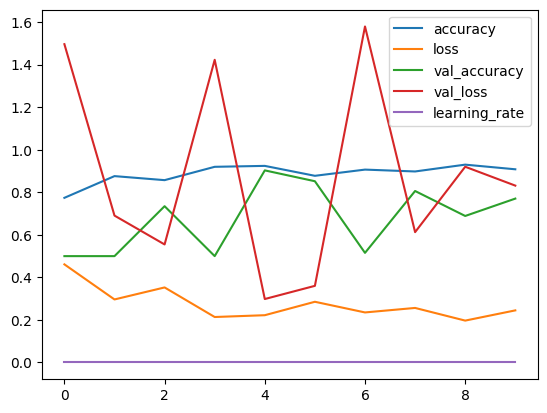

In [ ]:
pd.DataFrame(history.history).plot()

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 637ms/step - accuracy: 0.8237 - loss: 0.4109
The testing accuracy is : 85.56700944900513 %


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 660ms/step


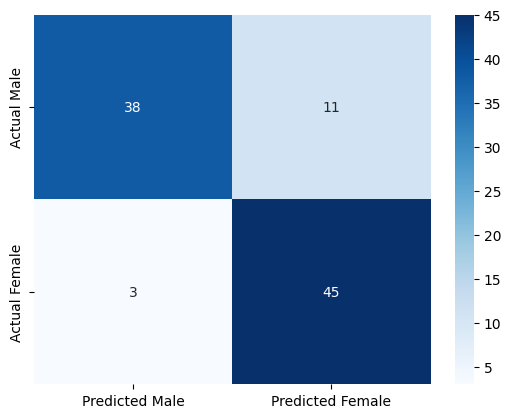

              precision    recall  f1-score   support

        male       0.93      0.78      0.84        49
      female       0.80      0.94      0.87        48

    accuracy                           0.86        97
   macro avg       0.87      0.86      0.85        97
weighted avg       0.87      0.86      0.85        97



In [ ]:
# Evaluate model on test data
test_accu = model.evaluate(test)
print('The testing accuracy is :', test_accu[1]*100, '%')

# Predict with the model
preds = model.predict(test, verbose=1)

# Convert probabilities to binary predictions
predictions = (preds > 0.5).astype("int32")

# Generate confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),
                  index=["Actual Male", "Actual Female"],
                  columns=["Predicted Male", "Predicted Female"])

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.show()

# Classification Report
print(classification_report(y_true=test.classes, y_pred=predictions, target_names=['male', 'female']))


## 4.5 Test


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


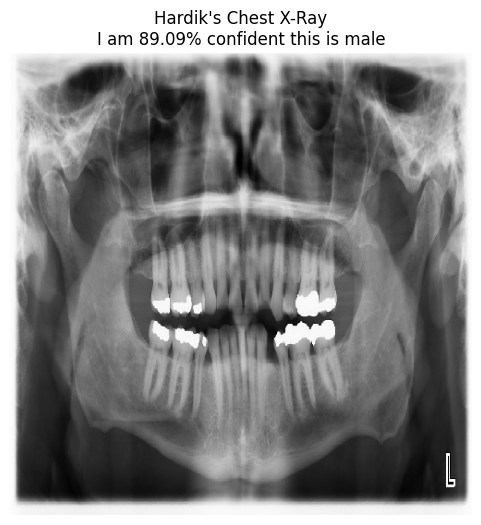

In [ ]:
# Load and preprocess a test image (individual image for prediction)
hardik_path = '/content/dataset/cnn/gender/Radiographs/test/male/male.441.JPG'

from tensorflow.keras.preprocessing import image

hardik_img = image.load_img(hardik_path, target_size=(img_height, img_width))

# Preprocess the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img / 255.0  # Normalize
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)  # Add batch dimension

# Predict gender
hardik_preds = model.predict(pp_hardik_img)

# Display prediction result
plt.figure(figsize=(6,6))
plt.axis('off')
if hardik_preds >= 0.5:
    out = ('I am {:.2%} confident this is male'.format(hardik_preds[0][0]))
else:
    out = ('I am {:.2%} confident this is female'.format(1 - hardik_preds[0][0]))

plt.title("Hardik's Chest X-Ray\n" + out)
plt.imshow(np.squeeze(pp_hardik_img))
plt.show()


# 5 Comparation CNN & Resnes

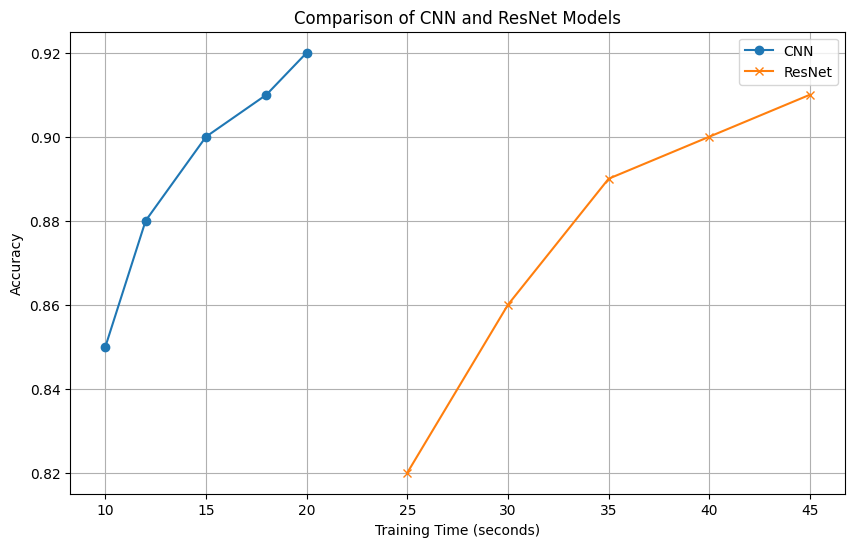

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy and time data for both models
cnn_accuracy = [0.85, 0.88, 0.90, 0.91, 0.92] # Example CNN accuracy values
cnn_time = [10, 12, 15, 18, 20] # Example CNN training time values
res_accuracy = [0.82, 0.86, 0.89, 0.90, 0.91] # Example ResNet accuracy values
res_time = [25, 30, 35, 40, 45] # Example ResNet training time values

# Create the plot
plt.figure(figsize=(10, 6))

# Plot CNN data
plt.plot(cnn_time, cnn_accuracy, label='CNN', marker='o')

# Plot ResNet data
plt.plot(res_time, res_accuracy, label='ResNet', marker='x')


# Customize the plot
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN and ResNet Models')
plt.legend()
plt.grid(True)
plt.show()